# Libraries

In [82]:



import numpy as np
import pandas as pd
import math 

from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score

from sklearn.preprocessing import MinMaxScaler , StandardScaler, Imputer, LabelEncoder

from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

import warnings
warnings.filterwarnings('ignore')

In [10]:
df=pd.read_csv ('diamonds.csv',index_col=0)

In [11]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [12]:
df.shape

(53940, 10)

In [13]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

# Checking Data for Missing Values

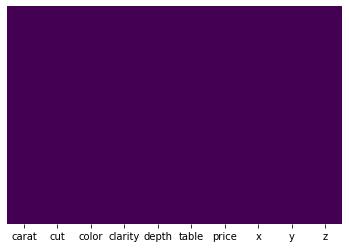

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [15]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# The Minimum value of x, y and z cant be 0 (impossible or yumpossible )

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)

In [19]:
%matplotlib inline


# Trying to Find out the Relations Between Different Variables

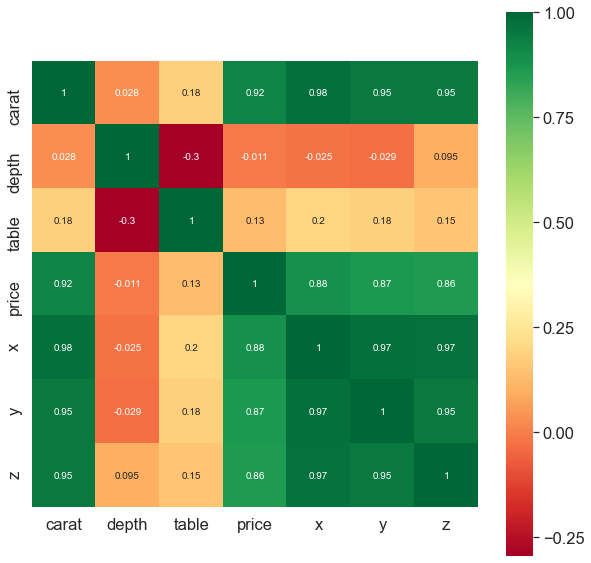

In [23]:
plt.figure(figsize=(10,10)) 
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',square=True) 

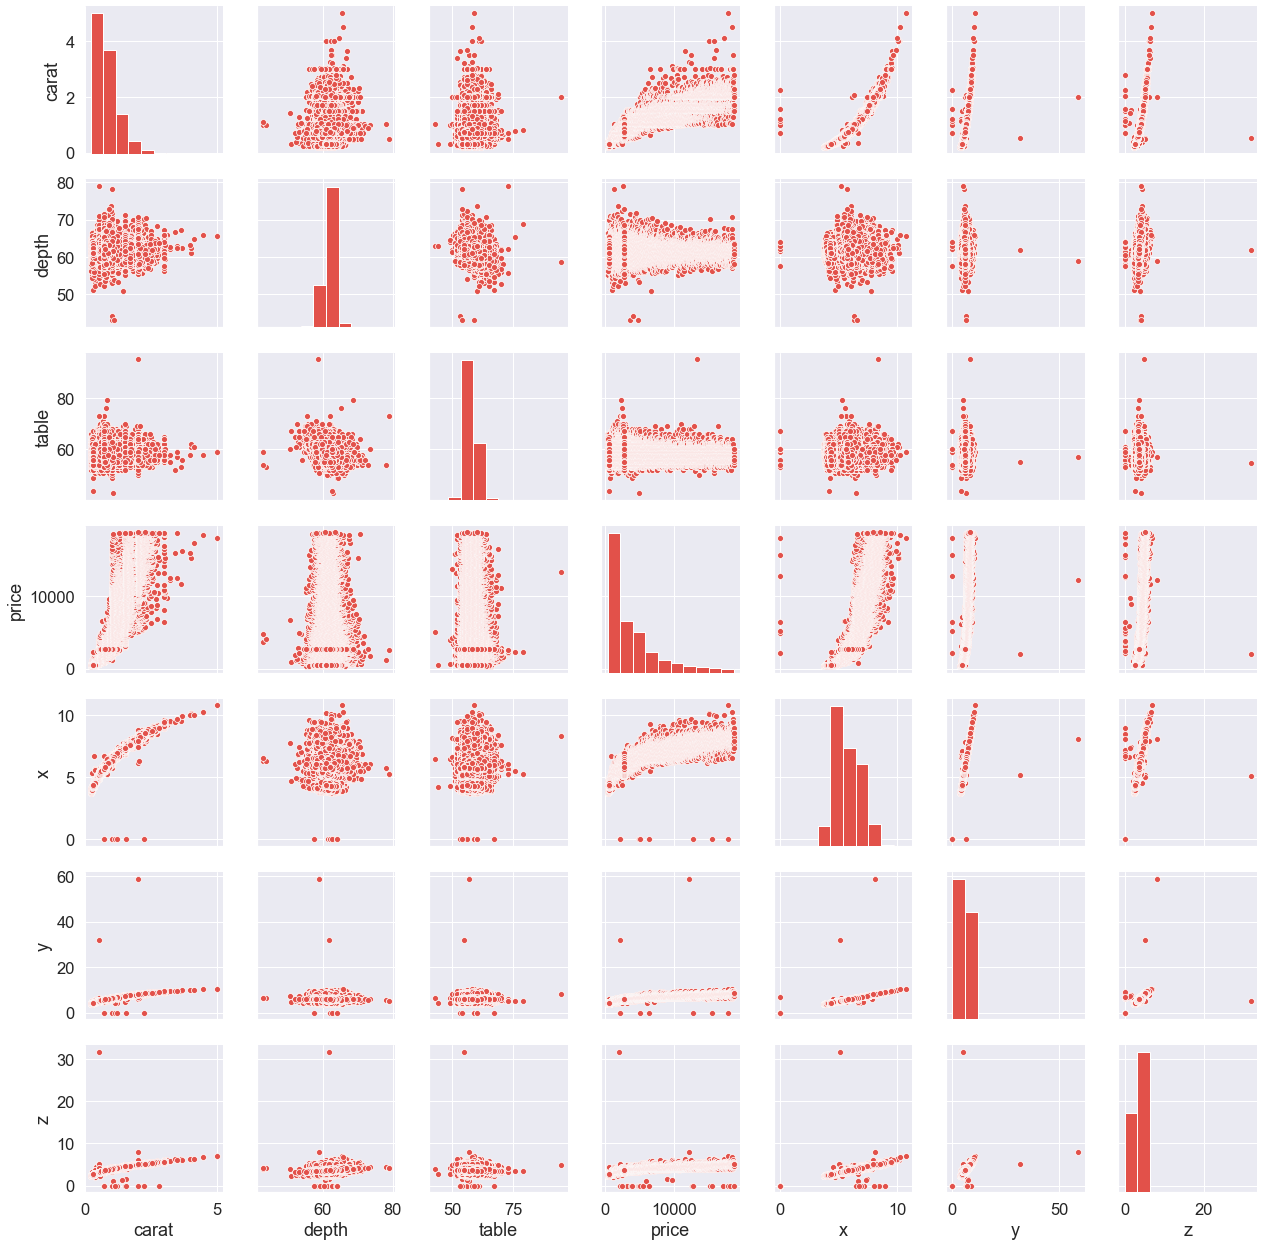

In [26]:
#plt.figure(figsize=(10,10))
sns.pairplot(df)


In [27]:
print("Number of rows with x == 0: {} ".format((df.x==0).sum()))
print("Number of rows with y == 0: {} ".format((df.y==0).sum()))
print("Number of rows with z == 0: {} ".format((df.z==0).sum()))
print("Number of rows with depth == 0: {} ".format((df.depth==0).sum()))

Number of rows with x == 0: 8 
Number of rows with y == 0: 7 
Number of rows with z == 0: 20 
Number of rows with depth == 0: 0 


In [29]:
df[['x','y','z']] = df[['x','y','z']].replace(0,np.NaN)


In [30]:
df.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           8
y           7
z          20
dtype: int64

In [32]:
df.dropna(inplace=True)


In [33]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [34]:
df.shape

(53920, 10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024A2C5147C8>,
      dtype=object)

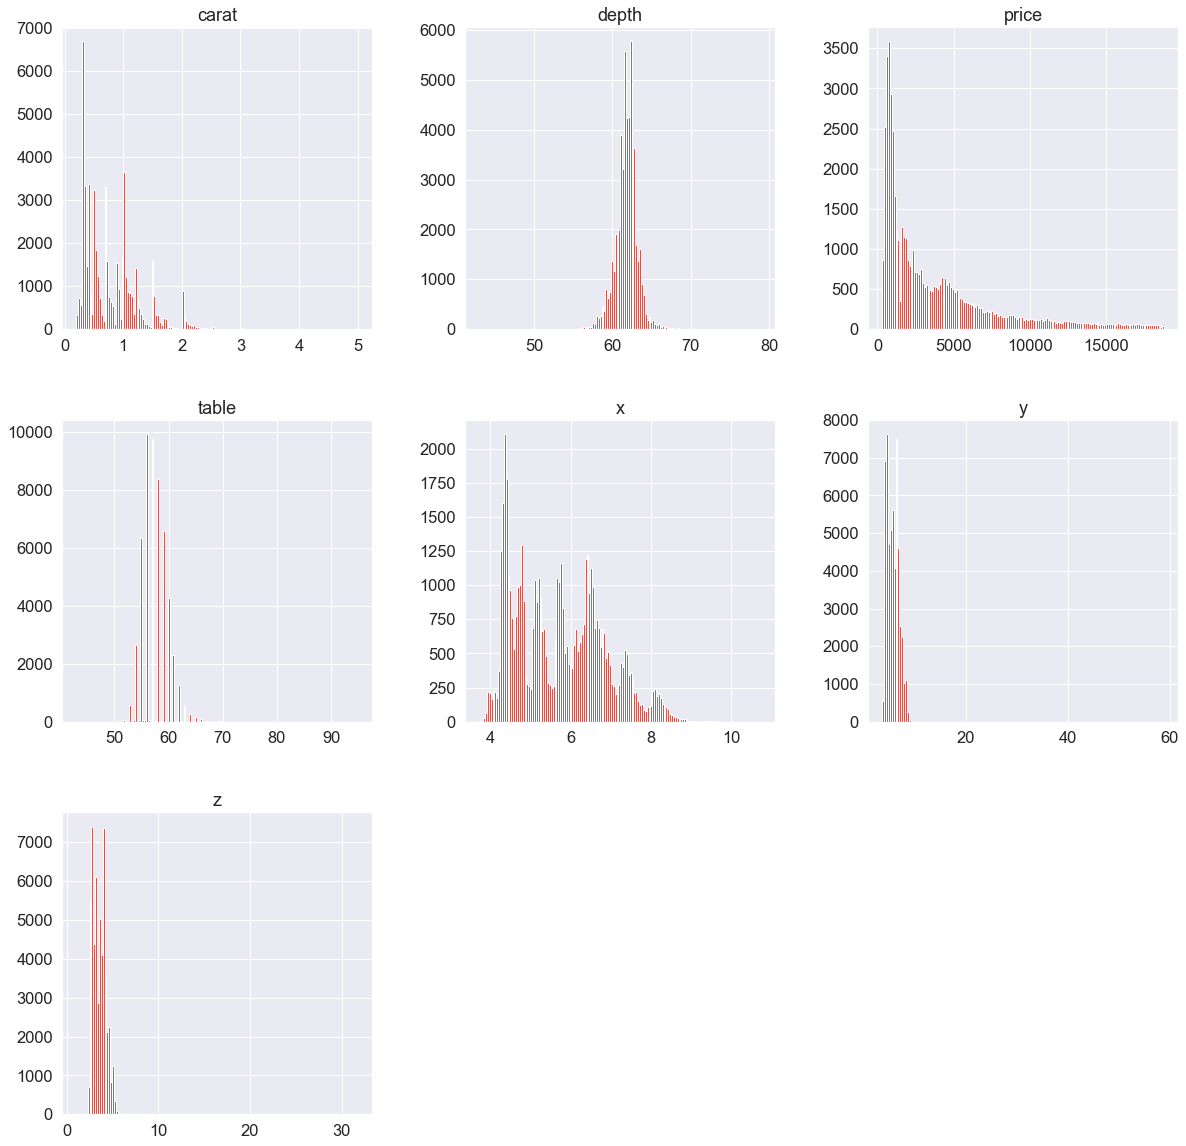

In [35]:
df.hist(figsize = (20,20),bins=150)


# Eyes On Categorical Data

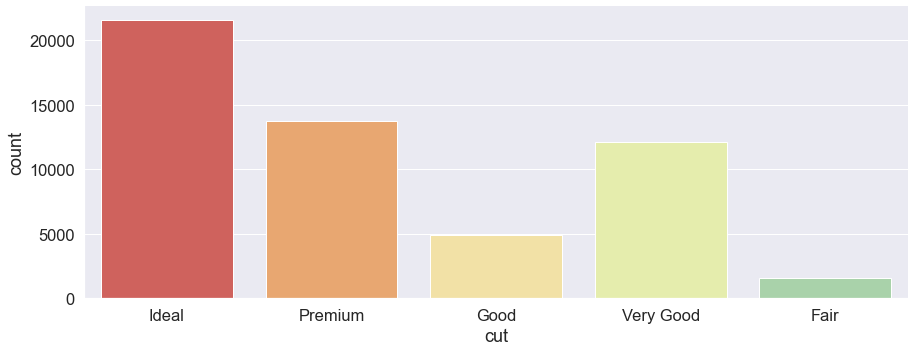

In [38]:
p = sns.factorplot(x='cut', data=df , kind='count',aspect=2.5 )


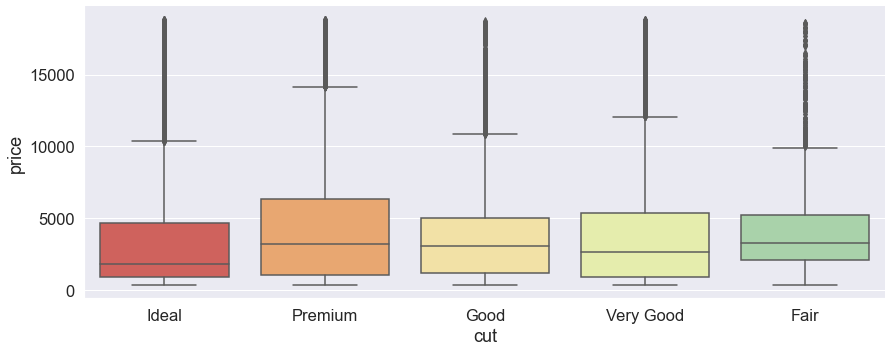

In [40]:
p = sns.factorplot(x='cut', y='price', data=df, kind='box' ,aspect=2.5 )


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024A32E36048>,
      dtype=object)

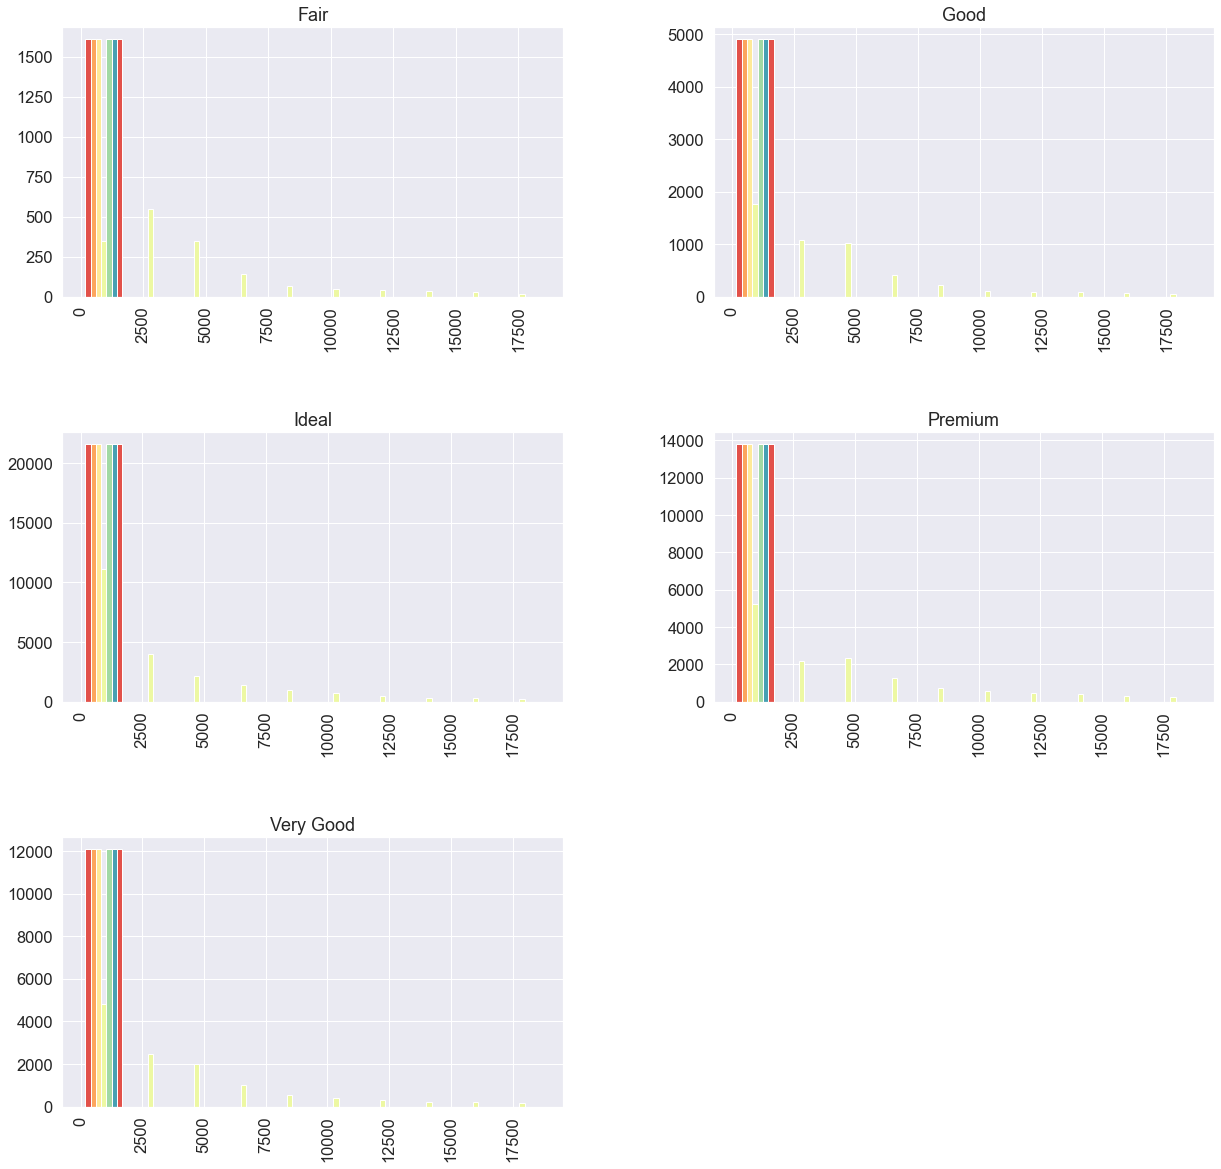

In [42]:
df.hist(figsize = (20,20), by=df.cut,grid=True)


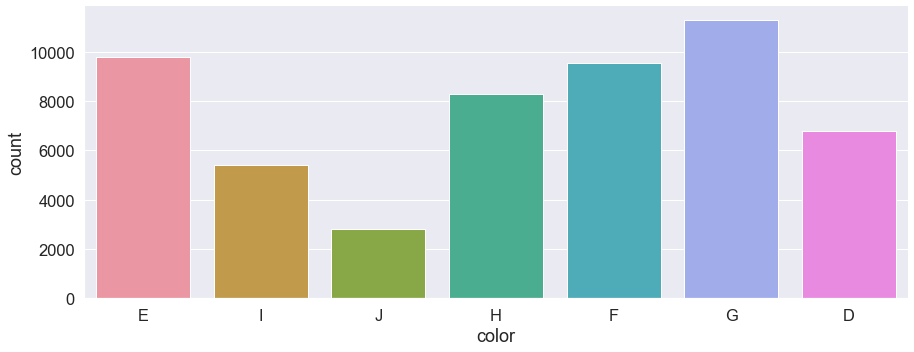

In [43]:
sns.factorplot(x='color', data=df , kind='count',aspect=2.5 )


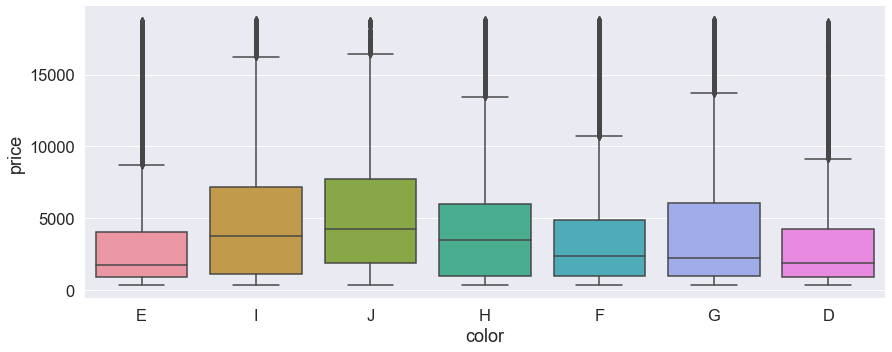

In [45]:
sns.factorplot(x='color', y='price', data=df, kind='box' ,aspect=2.5 )


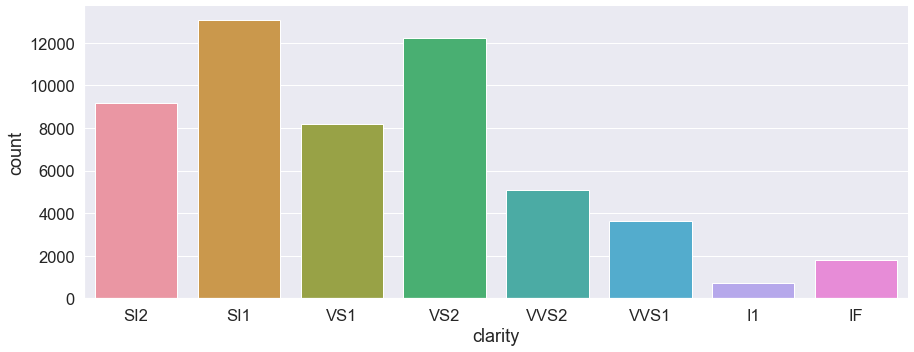

In [46]:
sns.factorplot(x='clarity', data=df , kind='count',aspect=2.5 )


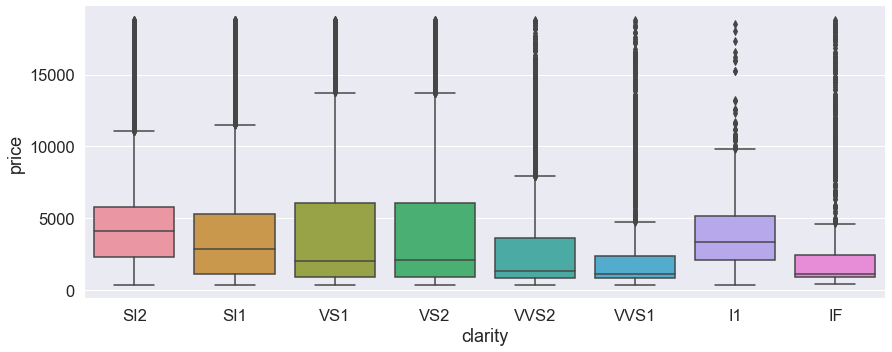

In [47]:
sns.factorplot(x='clarity', y='price', data=df, kind='box' ,aspect=2.5)


In [48]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Replace the Categorical data with Dummy Variable 

In [49]:
column=['cut','color','clarity']

In [50]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [55]:
main_df=df.copy()
final_df=df


In [56]:
df=category_onehot_multcols(column)


cut
color
clarity


In [57]:
df.head()

,carat,depth,table,price,x,y,z,Good,Ideal,Premium,...,H,I,J,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
1,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
5,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [58]:
df.shape

(53920, 24)

In [59]:
df =df.loc[:,~df.columns.duplicated()]


In [60]:
df.shape

(53920, 24)

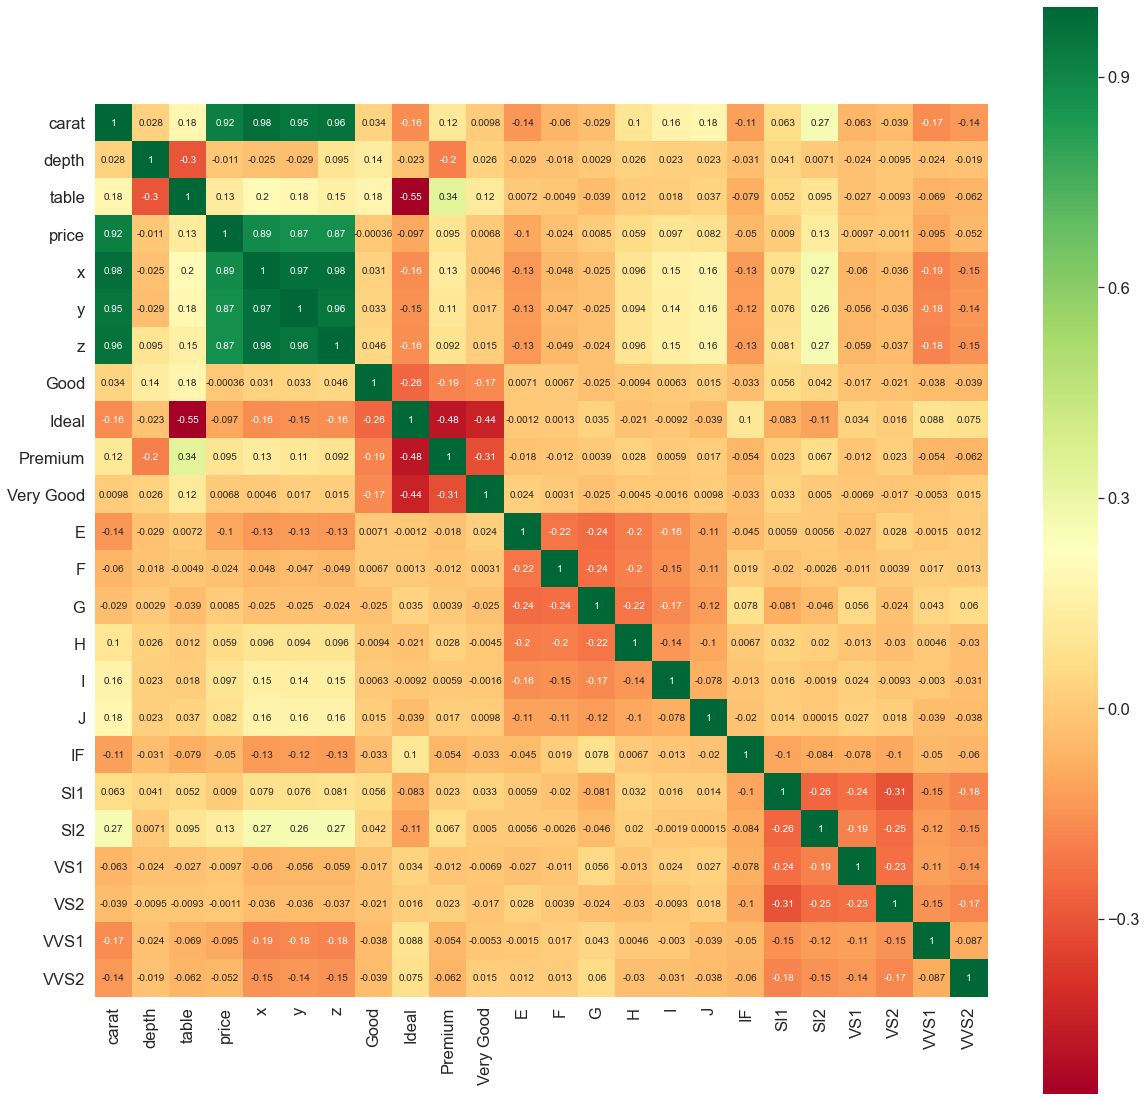

In [63]:
plt.figure(figsize=(20,20)) 
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',square=True) 

# Scale the Numerial Data

In [65]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
numericals =  pd.DataFrame(sc_X.fit_transform(df[['carat','depth','x','y','z','table']]),columns=['carat','depth','x','y','z','table'],index=df.index)

In [66]:
numericals

,carat,depth,x,y,z,table
1,-1.198204,-0.174203,-1.591573,-1.539219,-1.580084,-1.099725
2,-1.240417,-1.361090,-1.645173,-1.662014,-1.750896,1.585988
3,-1.198204,-3.385781,-1.502241,-1.460280,-1.750896,3.376463
4,-1.071566,0.454149,-1.368242,-1.319943,-1.295396,0.243131
5,-1.029353,1.082501,-1.243176,-1.214690,-1.124583,0.243131
...,...,...,...,...,...,...
53936,-0.163993,-0.662921,0.016413,0.022027,-0.057004,-0.204488
53937,-0.163993,0.942868,-0.037186,0.013256,0.099575,-1.099725
53938,-0.206205,0.733417,-0.063986,-0.048142,0.028403,1.138369
53939,0.131496,-0.523288,0.373744,0.337784,0.284622,0.243131


In [67]:
df[['carat','depth','x','y','z','table']] = numericals[['carat','depth','x','y','z','table']]

In [68]:
df.head()

,carat,depth,table,price,x,y,z,Good,Ideal,Premium,...,H,I,J,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
1,-1.198204,-0.174203,-1.099725,326,-1.591573,-1.539219,-1.580084,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,-1.240417,-1.361090,1.585988,326,-1.645173,-1.662014,-1.750896,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,-1.198204,-3.385781,3.376463,327,-1.502241,-1.460280,-1.750896,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,-1.071566,0.454149,0.243131,334,-1.368242,-1.319943,-1.295396,0,0,1,...,0,1,0,0,0,0,0,1,0,0
5,-1.029353,1.082501,0.243131,335,-1.243176,-1.214690,-1.124583,1,0,0,...,0,0,1,0,0,1,0,0,0,0


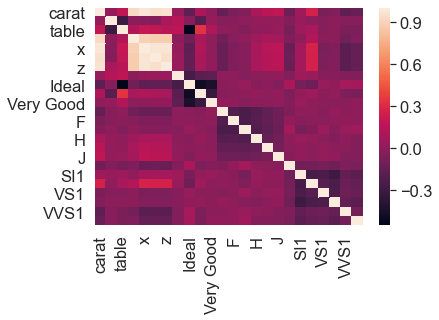

In [69]:
sns.heatmap(df.corr())

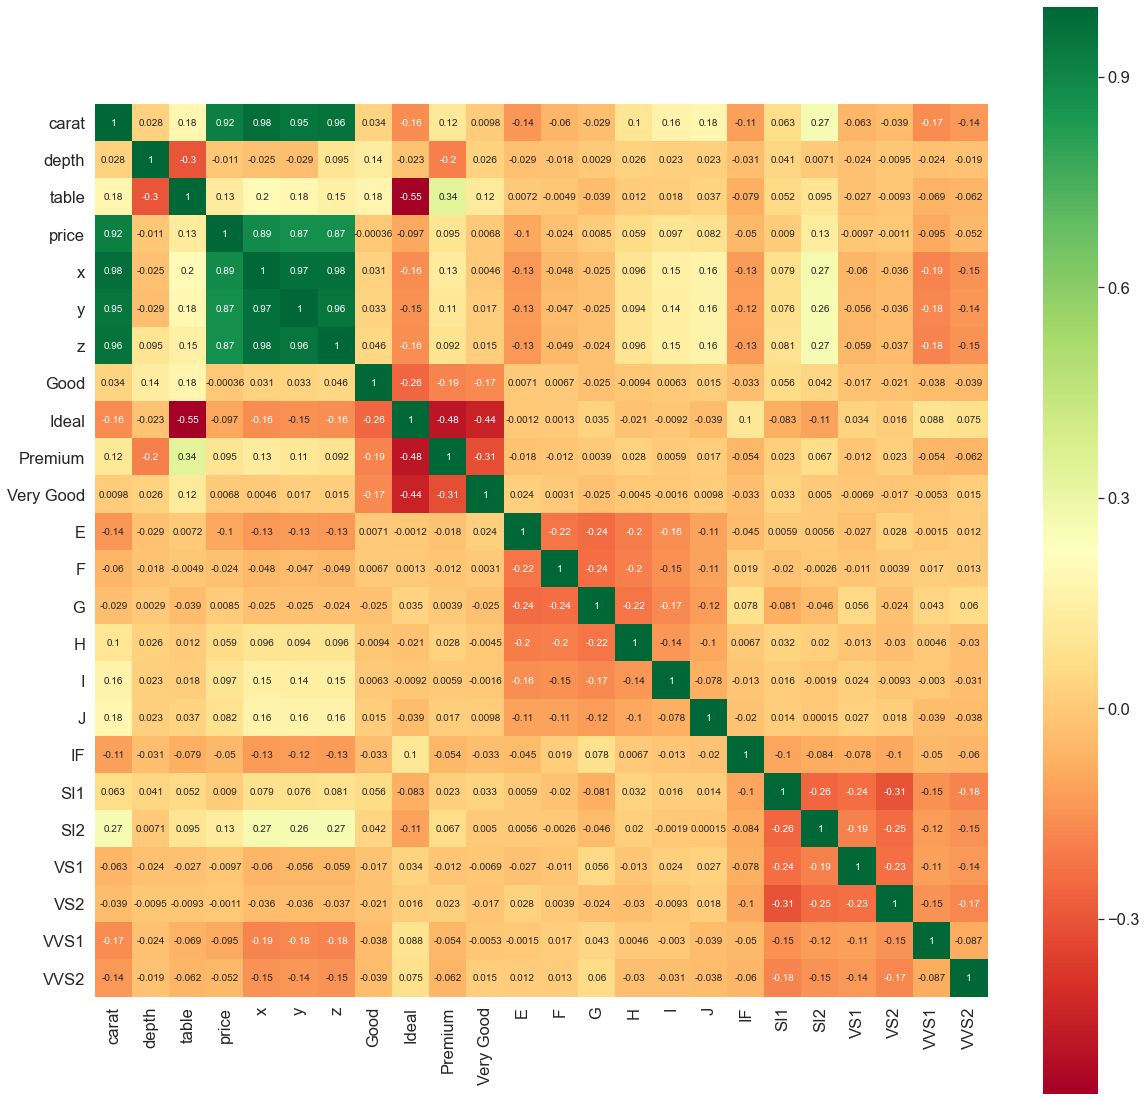

In [70]:
plt.figure(figsize=(20,20)) 
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',square=True) 

In [72]:
X = df.drop(["price"],axis=1)
y = df.price

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3 ,random_state=101)


# Modeling

In [108]:
# Collect all R2 Scores.
R2_Scores = []
models = ['Linear Regression' , 'Lasso Regression' , 'AdaBoost Regression' , 'Ridge Regression' , 'GradientBoosting Regression','RandomForest Regression' ,'KNeighbours Regression','Xgboost']


In [109]:
clf_lr = LinearRegression()
clf_lr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_lr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_lr.predict(X_test)
print('')
print('####### Linear Regression #######')
print('Score : %.4f' % clf_lr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



####### Linear Regression #######
Score : 0.9215
[0.91552768 0.92011407 0.87373849 0.91797805 0.92189685]

MSE    : 1239243.11 
MAE    : 734.97 
RMSE   : 1113.21 
R2     : 0.92 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [110]:
clf_la = Lasso(normalize=True)
clf_la.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_la, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_la.predict(X_test)
print('')
print('###### Lasso Regression ######')
print('Score : %.4f' % clf_la.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



###### Lasso Regression ######
Score : 0.8651
[0.86515835 0.86908554 0.87007    0.86946903 0.87381664]

MSE    : 2130005.10 
MAE    : 896.37 
RMSE   : 1459.45 
R2     : 0.87 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [111]:
clf_ar = AdaBoostRegressor(n_estimators=1000)
clf_ar.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_ar, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_ar.predict(X_test)
print('')
print('###### AdaBoost Regression ######')
print('Score : %.4f' % clf_ar.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.1s finished



###### AdaBoost Regression ######
Score : 0.7056
[0.85526504 0.87900653 0.8711906  0.87225097 0.7237834 ]

MSE    : 4647878.55 
MAE    : 1816.21 
RMSE   : 2155.89 
R2     : 0.71 


In [112]:
clf_rr = Ridge(normalize=True)
clf_rr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_rr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_rr.predict(X_test)
print('')
print('###### Ridge Regression ######')
print('Score : %.4f' % clf_rr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)


###### Ridge Regression ######
Score : 0.7954
[0.79585758 0.78780585 0.78886285 0.79700838 0.8007531 ]

MSE    : 3229646.32 
MAE    : 1142.97 
RMSE   : 1797.12 
R2     : 0.80 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [113]:
clf_gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='ls',verbose = 1)
clf_gbr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_gbr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_gbr.predict(X_test)
print('')
print('###### Gradient Boosting Regression #######')
print('Score : %.4f' % clf_gbr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)

      Iter       Train Loss   Remaining Time 
         1    14103193.3830            0.99s
         2    12489865.7814            1.08s
         3    11159436.8101            1.06s
         4     9972856.0502            0.98s
         5     8994738.5856            0.99s
         6     8110005.3769            0.94s
         7     7375000.3427            0.90s
         8     6737517.9130            0.94s
         9     6173234.6346            0.94s
        10     5698753.2289            0.96s
        20     3150624.9942            0.73s
        30     2336888.1245            0.62s
        40     2053368.5992            0.53s
        50     1911429.3638            0.45s
        60     1812625.0437            0.40s
        70     1739718.0324            0.29s
        80     1679054.3544            0.19s
        90     1628834.7988            0.09s
       100     1585226.1250            0.00s
      Iter       Train Loss   Remaining Time 
         1    14100320.6317            0.69s
        

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



        30     2317907.0329            0.52s
        40     2034412.2588            0.44s
        50     1892888.0013            0.35s
        60     1794026.6100            0.28s
        70     1721183.4400            0.21s
        80     1660497.7277            0.14s
        90     1610137.7629            0.08s
       100     1566805.0053            0.00s
      Iter       Train Loss   Remaining Time 
         1    13928428.7247            1.38s
         2    12344857.4938            1.17s
         3    11027625.5369            0.97s
         4     9858119.7216            0.86s
         5     8889244.4806            0.83s
         6     8036905.5153            0.78s
         7     7292438.7652            0.73s
         8     6660016.4119            0.76s
         9     6106819.2586            0.76s
        10     5637560.3569            0.81s
        20     3120451.9509            0.60s
        30     2315268.1032            0.49s
        40     2033758.4229            0.42s
        

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s finished


In [114]:
clf_rf = RandomForestRegressor()
clf_rf.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_rf, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_rf.predict(X_test)
print('')
print('###### Random Forest ######')
print('Score : %.4f' % clf_rf.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



###### Random Forest ######
Score : 0.9694
[0.97022164 0.97171711 0.97188038 0.96965714 0.97027634]

MSE    : 483182.18 
MAE    : 321.51 
RMSE   : 695.11 
R2     : 0.97 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.1s finished


In [115]:
no_of_test=[100]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='r2')
clf_rf.fit(X_train,y_train)
print('Score : %.4f' % clf_rf.score(X_test, y_test))
pred=clf_rf.predict(X_test)
r2 = r2_score(y_test, pred)
print('R2     : %0.2f ' % r2)
R2_Scores.append(r2)

Score : 0.9733
R2     : 0.97 


In [116]:
clf_knn = KNeighborsRegressor()
clf_knn.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_knn, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_knn.predict(X_test)
print('')
print('###### KNeighbours Regression ######')
print('Score : %.4f' % clf_knn.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   19.9s finished



###### KNeighbours Regression ######
Score : 0.9535
[0.95078696 0.95359373 0.95143327 0.95199746 0.95535044]

MSE    : 733307.32 
MAE    : 429.12 
RMSE   : 856.33 
R2     : 0.95 


In [117]:
n_neighbors=[]
for i in range (0,50,5):
    if(i!=0):
        n_neighbors.append(i)
params_dict={'n_neighbors':n_neighbors,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsRegressor(),param_grid=params_dict,scoring='r2')
clf_knn.fit(X_train,y_train)
print('Score : %.4f' % clf_knn.score(X_test, y_test))
pred=clf_knn.predict(X_test)
r2 = r2_score(y_test, pred)
print('R2     : %0.2f ' % r2)
R2_Scores.append(r2)

Score : 0.9535
R2     : 0.95 


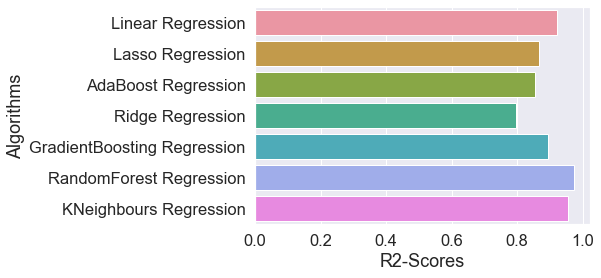

In [119]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

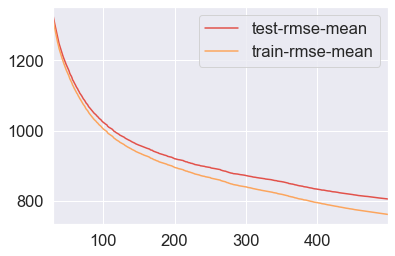

In [120]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [121]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) 
model_xgb.fit(X_train, y_train)

[23:14:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=360,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [122]:
xgb_preds_log = model_xgb.predict(X_test)

In [123]:
print('Score : %.4f' % model_xgb.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)
R2_Scores.append(r2)

Score : 0.9546
[0.95078696 0.95359373 0.95143327 0.95199746 0.95535044]

MSE    : 733307.32 
MAE    : 429.12 
RMSE   : 856.33 
R2     : 0.95 


0.9215066982840323

In [125]:
compare = pd.DataFrame({'Algorithms' : models , 'R2-Scores' : R2_Scores})
compare.sort_values(by='R2-Scores' ,ascending=False)

,Algorithms,R2-Scores
5,RandomForest Regression,0.973305
6,KNeighbours Regression,0.953545
7,Xgboost,0.953545
0,Linear Regression,0.921493
4,GradientBoosting Regression,0.895407
1,Lasso Regression,0.865063
3,Ridge Regression,0.795400
2,AdaBoost Regression,0.705555


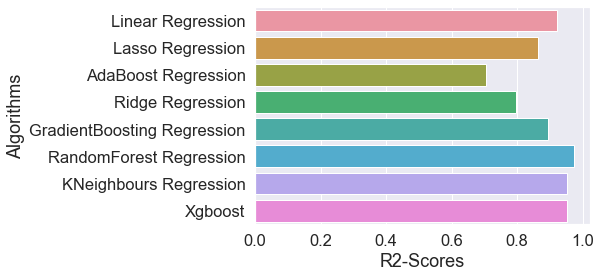

In [126]:
sns.barplot(x='R2-Scores' , y='Algorithms' , data=compare)


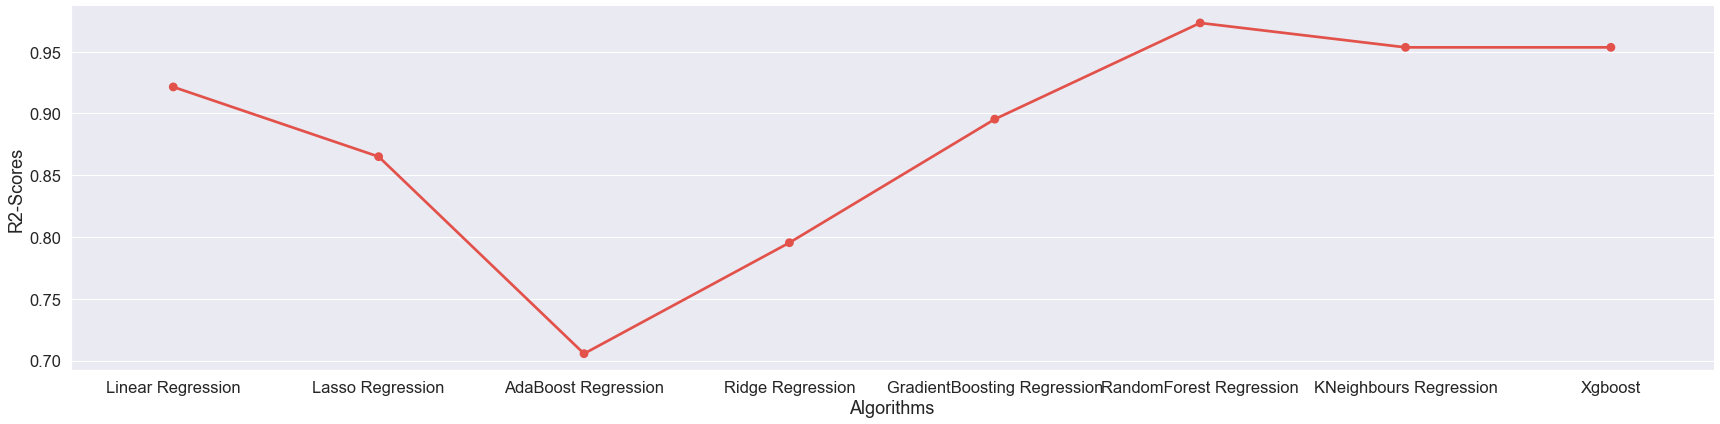

In [127]:
sns.factorplot(x='Algorithms', y='R2-Scores' , data=compare, size=6 , aspect=4)


# Random Forest Did the best job( we can also further improve it by tuning the hyperparameters)